## Import libraries

In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import seaborn as sns
import splitfolders as spfd
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, regularizers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D,Input,Dense,Conv2D,Add,SeparableConv2D,ReLU,BatchNormalization,MaxPool2D,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model
from prettytable import PrettyTable

from tqdm import tqdm

## Google Colab
Jalankan cell ini jika menggunakan google colab

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

## Dataset

In [2]:
dataset = 'D:/Latihan/Dataset'

## Exploratory Data Analysis & Data preparation

Menunjukkan Jumlah Image tiap Kelas

In [3]:
list = []
totalFiles = 0
totalDir = 0
for base, dirs, files in os.walk(dataset):
    list.append(len(files))
    #print('Searching in : {} with total {} image'.format(base,len(files)))
    for directories in dirs:
        totalDir += 1
    for Files in files:
        totalFiles += 1

In [5]:
index = np.arange(1,5,1)
d = {'Class': os.listdir(dataset), 'Total_image_in_class': np.delete(list, [0])}
data1 = pd.DataFrame(data=d, index=index)
data1

,Class,Total_image_in_class
1,Acne,778
2,Cancer,560
3,Rosacea,342
4,temp,311


Menunjukkan persebaran data tiap kelas melalui bar plot

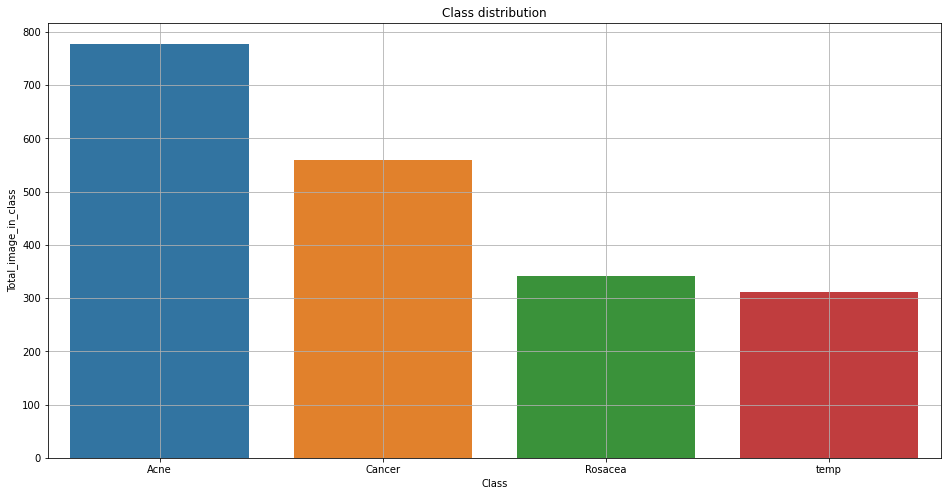

In [6]:
fig, ax = plt.subplots(figsize=(16,8))
sns.barplot(data=data1,x='Class', y='Total_image_in_class')
plt.title('Class distribution')
ax.grid()
plt.show()

In [7]:
print("Jumlah kelas dalam dataset adalah {}".format(len(data1)))
print("Jumlah total gambar dalam dataset adalah {}".format(sum(data1['Total_image_in_class'])))

Jumlah kelas dalam dataset adalah 4
Jumlah total gambar dalam dataset adalah 1991


Melakukan EDA lebih dalam lagi

In [8]:
filenames = []
folder = []
image = []
shape = []
x = []
y = []

for path, subdirs, files in tqdm(os.walk(dataset)):
    for name in files:
        filenames += [os.path.join(path, name)]
        folder += [os.path.basename(os.path.dirname(filenames[-1]))]
        image += [os.path.basename(filenames[-1])]
        
for i in range (len(filenames)) :
    shape += [cv2.imread(filenames[i]).shape[0:2]]

for i in range (len(filenames)) :
    x += [shape[i][0]]
    y += [shape[i][1]]

new_ip = []
for i in range(len(filenames)) :
    new = filenames[i].replace("\\", "/")
    new_ip.append(new)
    
data2 = pd.DataFrame({'Image path':new_ip, 'Class':folder, 'Name_Image':image})

5it [00:00, 199.90it/s]


In [9]:
extension = []
for i in range (sum(data1['Total_image_in_class'])) :
    strValue = data2['Name_Image'][i]
    ch = '.'
    newCh = strValue[strValue.find(ch):]
    extension.append(newCh)

In [10]:
data2['Class_num'] = pd.factorize(data2['Class'])[0]
data2['Extension'] = extension
data2['Shape(x,y)'] = shape
data2['x'] = x
data2['y'] = y
data2

,Image path,Class,Name_Image,Class_num,Extension,"Shape(x,y)",x,y
0,D:/Latihan/Dataset/Acne/0.jpg,Acne,0.jpg,0,.jpg,"(400, 400)",400,400
1,D:/Latihan/Dataset/Acne/008907VB.jpg,Acne,008907VB.jpg,0,.jpg,"(430, 260)",430,260
2,D:/Latihan/Dataset/Acne/008911VB.jpg,Acne,008911VB.jpg,0,.jpg,"(430, 260)",430,260
3,D:/Latihan/Dataset/Acne/008938HB.jpg,Acne,008938HB.jpg,0,.jpg,"(1181, 1640)",1181,1640
4,D:/Latihan/Dataset/Acne/032200VB.jpg,Acne,032200VB.jpg,0,.jpg,"(448, 260)",448,260
...,...,...,...,...,...,...,...,...
1986,D:/Latihan/Dataset/temp/perioral-dermatitis-96...,temp,perioral-dermatitis-96.jpg,3,.jpg,"(470, 720)",470,720
1987,D:/Latihan/Dataset/temp/perioral-dermatitis-97...,temp,perioral-dermatitis-97.jpg,3,.jpg,"(495, 720)",495,720
1988,D:/Latihan/Dataset/temp/perioral-dermatitis-98...,temp,perioral-dermatitis-98.jpg,3,.jpg,"(465, 720)",465,720
1989,D:/Latihan/Dataset/temp/perioral-dermatitis-99...,temp,perioral-dermatitis-99.jpg,3,.jpg,"(472, 720)",472,720


Dataframe diatas akan kita lakukan sort terhadap kolom x dan y

In [11]:
data2.sort_values(by=['x','y'])

,Image path,Class,Name_Image,Class_num,Extension,"Shape(x,y)",x,y
991,D:/Latihan/Dataset/Cancer/download (4).jpg,Cancer,download (4).jpg,1,.jpg,"(35, 31)",35,31
1084,D:/Latihan/Dataset/Cancer/images (9).jpg,Cancer,images (9).jpg,1,.jpg,"(42, 44)",42,44
1083,D:/Latihan/Dataset/Cancer/images (8)3.jpg,Cancer,images (8)3.jpg,1,.jpg,"(44, 38)",44,38
1080,D:/Latihan/Dataset/Cancer/images (8).jpg,Cancer,images (8).jpg,1,.jpg,"(44, 52)",44,52
1081,D:/Latihan/Dataset/Cancer/images (8)1.jpg,Cancer,images (8)1.jpg,1,.jpg,"(50, 45)",50,45
...,...,...,...,...,...,...,...,...
1472,D:/Latihan/Dataset/Rosacea/r72.jpg,Rosacea,r72.jpg,2,.jpg,"(2208, 1242)",2208,1242
1450,D:/Latihan/Dataset/Rosacea/r51.jpg,Rosacea,r51.jpg,2,.jpg,"(2379, 2751)",2379,2751
1822,D:/Latihan/Dataset/temp/d56.jpg,temp,d56.jpg,3,.jpg,"(2448, 3024)",2448,3024
1809,D:/Latihan/Dataset/temp/d44.jpg,temp,d44.jpg,3,.jpg,"(3088, 2320)",3088,2320


In [12]:
print("Ukuran gambar dalam dataset memiliki nilai minimum untuk (x,y) yaitu x={} dan y{}".format(min(x),min(y)))

Ukuran gambar dalam dataset memiliki nilai minimum untuk (x,y) yaitu x=35 dan y31


Kita buang gambar dalam dataset yang ukurannya kurang dari (180,180)

In [13]:
df_filtered = data2[(data2['x'] >= 180) & (data2['y'] >= 180)]
df_filtered

,Image path,Class,Name_Image,Class_num,Extension,"Shape(x,y)",x,y
0,D:/Latihan/Dataset/Acne/0.jpg,Acne,0.jpg,0,.jpg,"(400, 400)",400,400
1,D:/Latihan/Dataset/Acne/008907VB.jpg,Acne,008907VB.jpg,0,.jpg,"(430, 260)",430,260
2,D:/Latihan/Dataset/Acne/008911VB.jpg,Acne,008911VB.jpg,0,.jpg,"(430, 260)",430,260
3,D:/Latihan/Dataset/Acne/008938HB.jpg,Acne,008938HB.jpg,0,.jpg,"(1181, 1640)",1181,1640
4,D:/Latihan/Dataset/Acne/032200VB.jpg,Acne,032200VB.jpg,0,.jpg,"(448, 260)",448,260
...,...,...,...,...,...,...,...,...
1986,D:/Latihan/Dataset/temp/perioral-dermatitis-96...,temp,perioral-dermatitis-96.jpg,3,.jpg,"(470, 720)",470,720
1987,D:/Latihan/Dataset/temp/perioral-dermatitis-97...,temp,perioral-dermatitis-97.jpg,3,.jpg,"(495, 720)",495,720
1988,D:/Latihan/Dataset/temp/perioral-dermatitis-98...,temp,perioral-dermatitis-98.jpg,3,.jpg,"(465, 720)",465,720
1989,D:/Latihan/Dataset/temp/perioral-dermatitis-99...,temp,perioral-dermatitis-99.jpg,3,.jpg,"(472, 720)",472,720


Melihat kembali persebaran dataset kita

In [14]:
data3 = df_filtered.groupby('Class').count().rename({'Class_num': 'Total_image_in_class'}, axis='columns')
data3['Total_image_in_class']

Class
Acne       742
Cancer     512
Rosacea    287
temp       307
Name: Total_image_in_class, dtype: int64

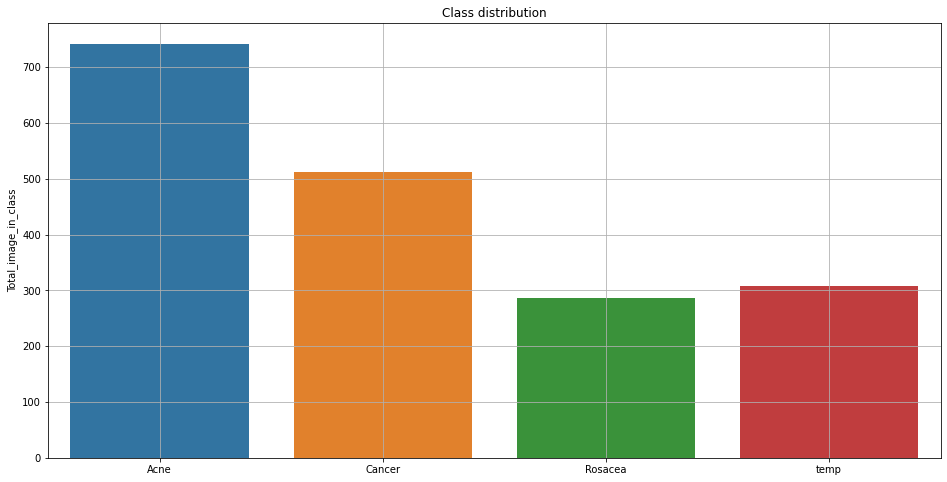

In [15]:
fig, ax = plt.subplots(figsize=(16,8))
sns.barplot(data=data3,x=data3.index.get_level_values(0).tolist(), y='Total_image_in_class')
plt.title('Class distribution')
ax.grid()
plt.show()

In [16]:
print("Jumlah kelas dalam dataset adalah {}".format(len(data3)))
print("Jumlah total gambar dalam dataset adalah {}".format(sum(data3['Total_image_in_class'])))

Jumlah kelas dalam dataset adalah 4
Jumlah total gambar dalam dataset adalah 1848


Persebaran data dari tiap kelas kurang merata

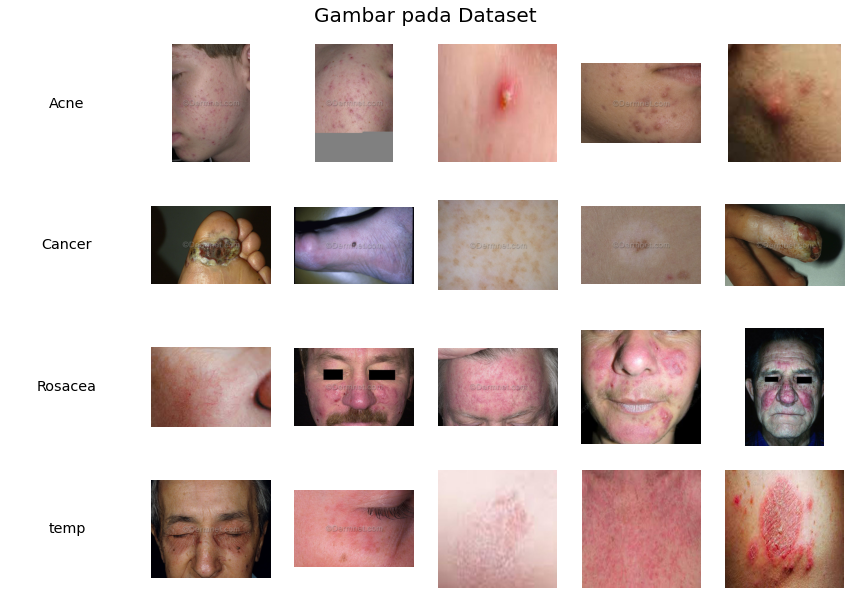

In [18]:
unique_list = []
unique = df_filtered.groupby('Class').apply(lambda df: df.sample(5))['Class'].unique()
fig = plt.figure(figsize=(15, 10))
plt.title('Gambar pada Dataset', fontsize=20, y=1.03)
plt.axis('off')
columns = 6
rows = 4
img2show = df_filtered.groupby('Class').apply(lambda df: df.sample(6))
for i in range(1, columns*rows +1):
    if i % columns == 1 :
        unique_list.append(i)
        fig.add_subplot(rows, columns, i)
        plt.text(0.5,0.5, unique[len(unique_list)-1], ha='center', va='center', fontsize='x-large', fontweight='normal')
        plt.axis('off')
    else :
        fig.add_subplot(rows, columns, i)
        img = mpimg.imread(img2show.iloc[i-1]['Image path'])
        #kelas = img2show.iloc[i-1]['Class']
        imgplot = plt.imshow(img)
        plt.axis('off')
        #plt.title(f'{kelas}')
plt.show()

## Data Splitting

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_filtered,
                                                    df_filtered['Class'], 
                                                    test_size=0.1, random_state=2022, stratify = df_filtered['Class'])

## Modelling

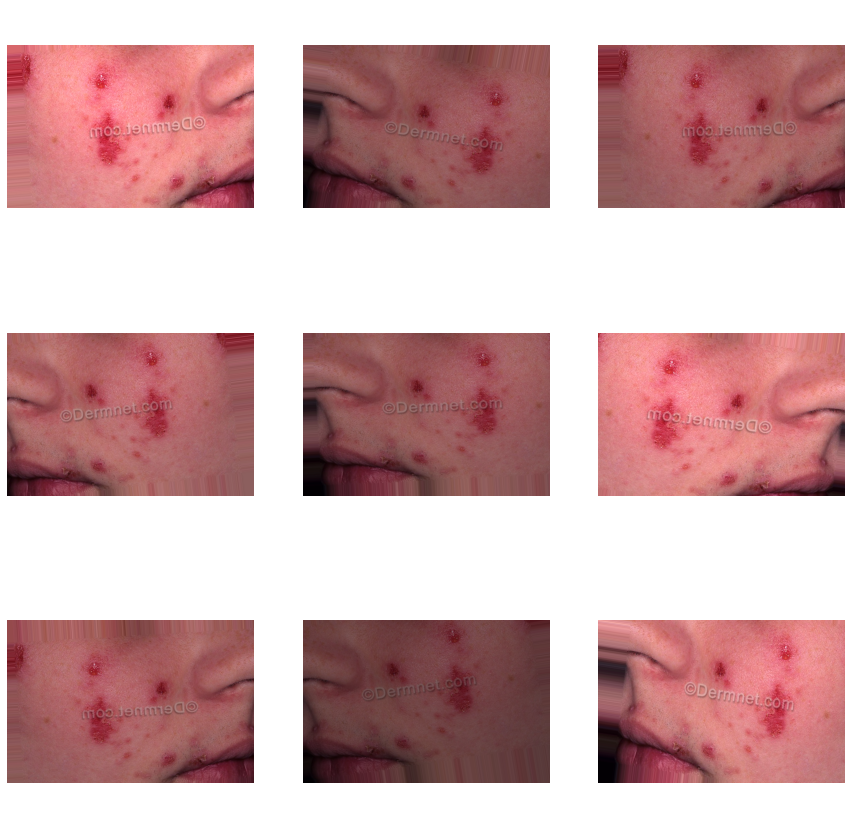

In [22]:
# Example of horizontal shift image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

# load the image
img = load_img("D:/Latihan/Dataset/Acne/acne-excoriated-29.jpg")
# Convert to numpy array
data = img_to_array(img)
# Expand dimension to one sample
samples = expand_dims(data, 0)
# Create image data augmentation generator
datagen = ImageDataGenerator(            rotation_range=10,
                                         zoom_range=0.1,
                                         horizontal_flip=True,
                                         brightness_range=[0.5,1.4],
                                         width_shift_range=0.1, 
                                         height_shift_range=0.1,
                             )
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot


fig = plt.figure(figsize=(15, 15))
plt.axis('off')
columns = 3
rows = 3

for i in range(1, columns*rows +1):
    batch = it.next()

    image = batch[0].astype('uint8')

    fig.add_subplot(rows, columns, i)
    imgplot = plt.imshow(image)
    
    plt.axis('off')
plt.show()

In [89]:
train_datagen = ImageDataGenerator(rotation_range=10,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   rescale=1/255,
                                   brightness_range=[0.4,1.5],
                                   width_shift_range=0.1,
                                   height_shift_range=0.1) 
    
validation_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

In [90]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.nasnet import NASNetMobile, NASNetLarge
from tensorflow.keras.applications.efficientnet import EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7

list_model = [EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, 
              EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7,
              InceptionV3, MobileNet, MobileNetV2, NASNetMobile, NASNetLarge, 
              ResNet50, ResNet50V2, VGG16, VGG19
             ]

def load_pretrained_model(model_name, input_shape, include_top, weights, pooling) :
    pretrained_model = model_name(include_top = include_top,
                                  input_shape = input_shape, 
                                  weights =  weights,
                                  pooling = pooling
                                 )
    print("Using {} pretrained_model with input_shape = {}".format(model_name, input_shape))
    return pretrained_model

In [91]:
##################################################
# Define input to load_pretrained_model function #
##################################################

n = 16 #Masukkan angka dari 0-16
model_name = list_model[n] #Tidak perlu diubah-ubah
input_shape = (180,180, 3)
include_top = False
weights = 'imagenet'
pooling = 'avg'

##################################################

pretrained_model= load_pretrained_model(model_name, input_shape, include_top, weights, pooling)
#pretrained_model.trainable = False
for layer in pretrained_model.layers:
        layer.trainable=False

Using <function VGG19 at 0x00000184F87881F0> pretrained_model with input_shape = (180, 180, 3)


In [92]:
pretrained_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [93]:
def getModel():
    model = Sequential()
    model.add(pretrained_model),

    model.add(Flatten()),
    model.add(BatchNormalization()),
    model.add(Dense(64, activation='relu')),
    model.add(Dense(4, activation='softmax'))
    
    return model

In [94]:
getModel().summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 512)               20024384  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 64)                32832     
                                                                 
 dense_3 (Dense)             (None, 4)                 260       
                                                                 
Total params: 20,059,524
Trainable params: 34,116
Non-trainable params: 20,025,408
_____________________________________

In [95]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def scheduler(epoch, lr):
    if epoch <= 60:
        return lr 
    else:
        return lr * tf.math.exp(-0.1)

In [96]:
def plot_result(history, epoch, title):
    plt.style.use('ggplot')

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    f1 = history.history['f1']
    val_f1 = history.history['val_f1']

    learning_rate = history.history['lr']

    epochs_range = range(epoch)

    fig = plt.figure(figsize=(18, 8))
    st = fig.suptitle(title, fontsize=20, y=0.6)
    plt.subplot(2, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.subplot(2, 2, 3)
    plt.plot(epochs_range, f1, label='Training F1')
    plt.plot(epochs_range, val_f1, label='Validation F1')
    plt.legend(loc='lower right')
    plt.title('Training and Validation F1')

    plt.subplot(2, 2, 4)
    plt.plot(epochs_range, learning_rate)
    plt.title('Learning Rate')

    st.set_y(0.95)
    plt.show()

In [97]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix, f1_score, precision_recall_fscore_support
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay
# ===============Stratified K-Fold======================
num_fold = 4
skf = StratifiedKFold(n_splits=num_fold, shuffle=True)
skf.get_n_splits(X_train, y_train)

4

In [98]:
# Membuat list untuk menampung semua metrics
accuracy = []
val_accuracy = []

loss = []
val_loss = []

f_1 = []
val_f1 = []

Fold 1/4

Found 1247 validated image filenames belonging to 4 classes.
Found 416 validated image filenames belonging to 4 classes.

Epoch 00001: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/100
38/38 [==============================] - 20s 491ms/step - loss: 1.1702 - accuracy: 0.5053 - f1: 0.3774 - val_loss: 1.3650 - val_accuracy: 0.4183 - val_f1: 0.0312 - lr: 0.0010

Epoch 00002: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/100
38/38 [==============================] - 19s 502ms/step - loss: 0.9084 - accuracy: 0.6379 - f1: 0.5927 - val_loss: 1.3071 - val_accuracy: 0.4231 - val_f1: 0.0747 - lr: 0.0010

Epoch 00003: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/100
38/38 [==============================] - 19s 500ms/step - loss: 0.8330 - accuracy: 0.6658 - f1: 0.6354 - val_loss: 1.2045 - val_accuracy: 0.4928 - val_f1: 0.0647 - lr: 0.0010

Epoch 00004: LearningRateScheduler setting learning rat

38/38 [==============================] - 19s 500ms/step - loss: 0.5134 - accuracy: 0.8000 - f1: 0.7999 - val_loss: 0.7393 - val_accuracy: 0.7380 - val_f1: 0.7339 - lr: 0.0010

Epoch 00031: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 31/100
38/38 [==============================] - 19s 502ms/step - loss: 0.5205 - accuracy: 0.7918 - f1: 0.7849 - val_loss: 0.7236 - val_accuracy: 0.7308 - val_f1: 0.7279 - lr: 0.0010

Epoch 00032: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 32/100
38/38 [==============================] - 19s 503ms/step - loss: 0.5166 - accuracy: 0.7926 - f1: 0.7900 - val_loss: 0.7625 - val_accuracy: 0.6971 - val_f1: 0.7145 - lr: 0.0010

Epoch 00033: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 33/100
38/38 [==============================] - 19s 501ms/step - loss: 0.5373 - accuracy: 0.7942 - f1: 0.7877 - val_loss: 0.7281 - val_accuracy: 0.7308 - val_f1: 0.7301 - lr: 0.0010

Epoch 00

38/38 [==============================] - 19s 503ms/step - loss: 0.4183 - accuracy: 0.8370 - f1: 0.8329 - val_loss: 0.7355 - val_accuracy: 0.7500 - val_f1: 0.7565 - lr: 0.0010

Epoch 00061: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 61/100
38/38 [==============================] - 19s 498ms/step - loss: 0.4215 - accuracy: 0.8403 - f1: 0.8305 - val_loss: 0.7583 - val_accuracy: 0.7500 - val_f1: 0.7443 - lr: 0.0010

Epoch 00062: LearningRateScheduler setting learning rate to tf.Tensor(0.0009048374, shape=(), dtype=float32).
Epoch 62/100
38/38 [==============================] - 19s 501ms/step - loss: 0.4101 - accuracy: 0.8337 - f1: 0.8342 - val_loss: 0.7365 - val_accuracy: 0.7620 - val_f1: 0.7622 - lr: 9.0484e-04

Epoch 00063: LearningRateScheduler setting learning rate to tf.Tensor(0.0008187307, shape=(), dtype=float32).
Epoch 63/100
38/38 [==============================] - 19s 499ms/step - loss: 0.4244 - accuracy: 0.8395 - f1: 0.8340 - val_loss: 0.7395 - va

38/38 [==============================] - 20s 512ms/step - loss: 0.3797 - accuracy: 0.8494 - f1: 0.8446 - val_loss: 0.7472 - val_accuracy: 0.7500 - val_f1: 0.7445 - lr: 7.4273e-05

Epoch 00088: LearningRateScheduler setting learning rate to tf.Tensor(6.720541e-05, shape=(), dtype=float32).
Epoch 88/100
38/38 [==============================] - 20s 521ms/step - loss: 0.3687 - accuracy: 0.8601 - f1: 0.8579 - val_loss: 0.7410 - val_accuracy: 0.7572 - val_f1: 0.7492 - lr: 6.7205e-05

Epoch 00089: LearningRateScheduler setting learning rate to tf.Tensor(6.0809965e-05, shape=(), dtype=float32).
Epoch 89/100
38/38 [==============================] - 20s 520ms/step - loss: 0.3691 - accuracy: 0.8617 - f1: 0.8592 - val_loss: 0.7415 - val_accuracy: 0.7620 - val_f1: 0.7495 - lr: 6.0810e-05

Epoch 00090: LearningRateScheduler setting learning rate to tf.Tensor(5.502313e-05, shape=(), dtype=float32).
Epoch 90/100
38/38 [==============================] - 19s 503ms/step - loss: 0.3719 - accuracy: 0.8535 

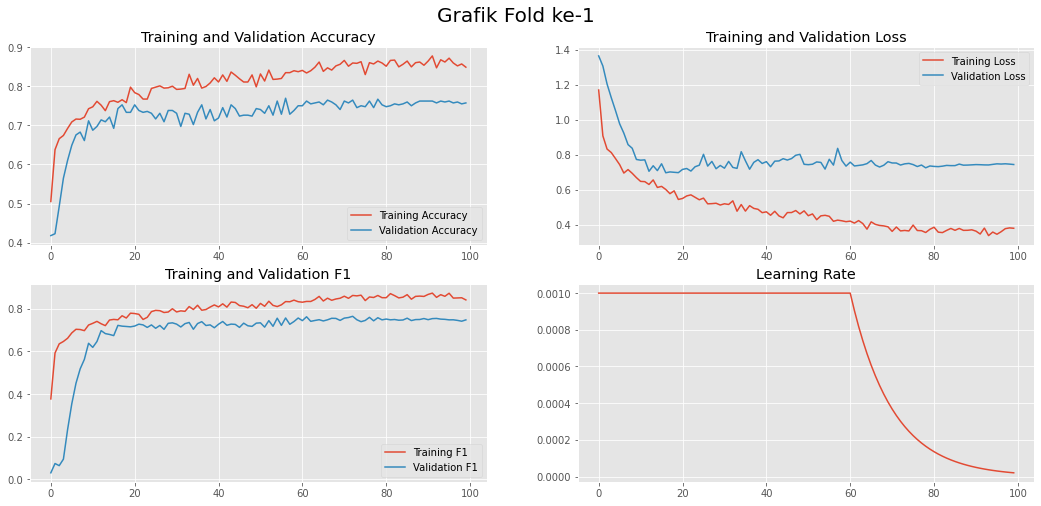


Fold 2/4

Found 1247 validated image filenames belonging to 4 classes.
Found 416 validated image filenames belonging to 4 classes.

Epoch 00001: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/100
38/38 [==============================] - 21s 534ms/step - loss: 1.2464 - accuracy: 0.4840 - f1: 0.4056 - val_loss: 1.2545 - val_accuracy: 0.4014 - val_f1: 0.2625 - lr: 0.0010

Epoch 00002: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/100
38/38 [==============================] - 21s 539ms/step - loss: 0.9353 - accuracy: 0.5992 - f1: 0.5726 - val_loss: 1.2075 - val_accuracy: 0.4447 - val_f1: 0.0789 - lr: 0.0010

Epoch 00003: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/100
38/38 [==============================] - 20s 527ms/step - loss: 0.8681 - accuracy: 0.6519 - f1: 0.6179 - val_loss: 1.1693 - val_accuracy: 0.5264 - val_f1: 0.0830 - lr: 0.0010

Epoch 00004: LearningRateScheduler setting learning ra

38/38 [==============================] - 20s 513ms/step - loss: 0.4988 - accuracy: 0.7992 - f1: 0.7987 - val_loss: 0.7776 - val_accuracy: 0.7284 - val_f1: 0.7085 - lr: 0.0010

Epoch 00031: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 31/100
38/38 [==============================] - 20s 517ms/step - loss: 0.5332 - accuracy: 0.7918 - f1: 0.7891 - val_loss: 0.8074 - val_accuracy: 0.7284 - val_f1: 0.7189 - lr: 0.0010

Epoch 00032: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 32/100
38/38 [==============================] - 20s 520ms/step - loss: 0.5140 - accuracy: 0.8025 - f1: 0.7957 - val_loss: 0.7686 - val_accuracy: 0.7284 - val_f1: 0.7144 - lr: 0.0010

Epoch 00033: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 33/100
38/38 [==============================] - 20s 516ms/step - loss: 0.5070 - accuracy: 0.8008 - f1: 0.7930 - val_loss: 0.8036 - val_accuracy: 0.7188 - val_f1: 0.7320 - lr: 0.0010

Epoch 00

38/38 [==============================] - 20s 509ms/step - loss: 0.4521 - accuracy: 0.8288 - f1: 0.8213 - val_loss: 0.7925 - val_accuracy: 0.7452 - val_f1: 0.7310 - lr: 0.0010

Epoch 00061: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 61/100
38/38 [==============================] - 20s 512ms/step - loss: 0.4521 - accuracy: 0.8140 - f1: 0.8172 - val_loss: 0.8338 - val_accuracy: 0.7524 - val_f1: 0.7428 - lr: 0.0010

Epoch 00062: LearningRateScheduler setting learning rate to tf.Tensor(0.0009048374, shape=(), dtype=float32).
Epoch 62/100
38/38 [==============================] - 19s 505ms/step - loss: 0.4083 - accuracy: 0.8453 - f1: 0.8428 - val_loss: 0.7873 - val_accuracy: 0.7452 - val_f1: 0.7331 - lr: 9.0484e-04

Epoch 00063: LearningRateScheduler setting learning rate to tf.Tensor(0.0008187307, shape=(), dtype=float32).
Epoch 63/100
38/38 [==============================] - 19s 506ms/step - loss: 0.4050 - accuracy: 0.8436 - f1: 0.8440 - val_loss: 0.8208 - va

38/38 [==============================] - 20s 507ms/step - loss: 0.3735 - accuracy: 0.8428 - f1: 0.8456 - val_loss: 0.7851 - val_accuracy: 0.7620 - val_f1: 0.7525 - lr: 7.4273e-05

Epoch 00088: LearningRateScheduler setting learning rate to tf.Tensor(6.720541e-05, shape=(), dtype=float32).
Epoch 88/100
38/38 [==============================] - 20s 510ms/step - loss: 0.3637 - accuracy: 0.8675 - f1: 0.8636 - val_loss: 0.7806 - val_accuracy: 0.7668 - val_f1: 0.7556 - lr: 6.7205e-05

Epoch 00089: LearningRateScheduler setting learning rate to tf.Tensor(6.0809965e-05, shape=(), dtype=float32).
Epoch 89/100
38/38 [==============================] - 20s 513ms/step - loss: 0.3547 - accuracy: 0.8691 - f1: 0.8672 - val_loss: 0.7775 - val_accuracy: 0.7620 - val_f1: 0.7529 - lr: 6.0810e-05

Epoch 00090: LearningRateScheduler setting learning rate to tf.Tensor(5.502313e-05, shape=(), dtype=float32).
Epoch 90/100
38/38 [==============================] - 20s 514ms/step - loss: 0.3669 - accuracy: 0.8601 

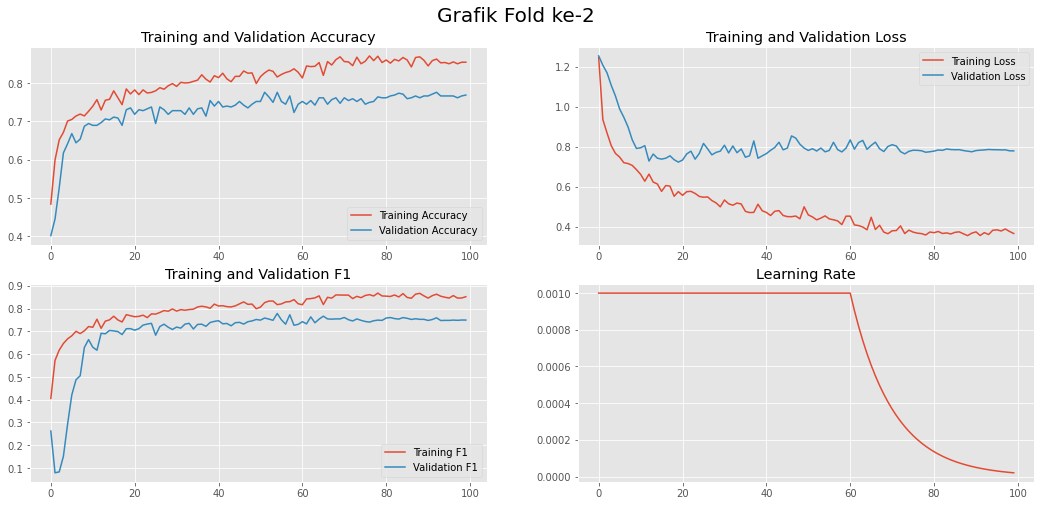


Fold 3/4

Found 1247 validated image filenames belonging to 4 classes.
Found 416 validated image filenames belonging to 4 classes.

Epoch 00001: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/100
38/38 [==============================] - 21s 518ms/step - loss: 1.2390 - accuracy: 0.4658 - f1: 0.3640 - val_loss: 1.2903 - val_accuracy: 0.4014 - val_f1: 0.1550 - lr: 0.0010

Epoch 00002: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/100
38/38 [==============================] - 20s 518ms/step - loss: 0.9221 - accuracy: 0.6156 - f1: 0.5840 - val_loss: 1.2411 - val_accuracy: 0.4014 - val_f1: 0.3067 - lr: 0.0010

Epoch 00003: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/100
38/38 [==============================] - 20s 511ms/step - loss: 0.8444 - accuracy: 0.6626 - f1: 0.6406 - val_loss: 1.1610 - val_accuracy: 0.4519 - val_f1: 0.1681 - lr: 0.0010

Epoch 00004: LearningRateScheduler setting learning ra

38/38 [==============================] - 20s 514ms/step - loss: 0.5134 - accuracy: 0.8074 - f1: 0.8006 - val_loss: 0.7081 - val_accuracy: 0.7548 - val_f1: 0.7425 - lr: 0.0010

Epoch 00031: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 31/100
38/38 [==============================] - 20s 516ms/step - loss: 0.5417 - accuracy: 0.7868 - f1: 0.7854 - val_loss: 0.6957 - val_accuracy: 0.7572 - val_f1: 0.7509 - lr: 0.0010

Epoch 00032: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 32/100
38/38 [==============================] - 20s 513ms/step - loss: 0.5431 - accuracy: 0.7926 - f1: 0.7833 - val_loss: 0.7199 - val_accuracy: 0.7404 - val_f1: 0.7339 - lr: 0.0010

Epoch 00033: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 33/100
38/38 [==============================] - 20s 517ms/step - loss: 0.5077 - accuracy: 0.7992 - f1: 0.7987 - val_loss: 0.7076 - val_accuracy: 0.7524 - val_f1: 0.7550 - lr: 0.0010

Epoch 00

38/38 [==============================] - 20s 519ms/step - loss: 0.4553 - accuracy: 0.8173 - f1: 0.8192 - val_loss: 0.7551 - val_accuracy: 0.7596 - val_f1: 0.7580 - lr: 0.0010

Epoch 00061: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 61/100
38/38 [==============================] - 20s 519ms/step - loss: 0.4225 - accuracy: 0.8305 - f1: 0.8281 - val_loss: 0.7445 - val_accuracy: 0.7596 - val_f1: 0.7518 - lr: 0.0010

Epoch 00062: LearningRateScheduler setting learning rate to tf.Tensor(0.0009048374, shape=(), dtype=float32).
Epoch 62/100
38/38 [==============================] - 20s 518ms/step - loss: 0.4191 - accuracy: 0.8329 - f1: 0.8310 - val_loss: 0.7340 - val_accuracy: 0.7644 - val_f1: 0.7607 - lr: 9.0484e-04

Epoch 00063: LearningRateScheduler setting learning rate to tf.Tensor(0.0008187307, shape=(), dtype=float32).
Epoch 63/100
38/38 [==============================] - 20s 519ms/step - loss: 0.4299 - accuracy: 0.8263 - f1: 0.8197 - val_loss: 0.7465 - va

38/38 [==============================] - 20s 521ms/step - loss: 0.3893 - accuracy: 0.8535 - f1: 0.8546 - val_loss: 0.7088 - val_accuracy: 0.7644 - val_f1: 0.7602 - lr: 7.4273e-05

Epoch 00088: LearningRateScheduler setting learning rate to tf.Tensor(6.720541e-05, shape=(), dtype=float32).
Epoch 88/100
38/38 [==============================] - 20s 519ms/step - loss: 0.3625 - accuracy: 0.8576 - f1: 0.8574 - val_loss: 0.7144 - val_accuracy: 0.7620 - val_f1: 0.7616 - lr: 6.7205e-05

Epoch 00089: LearningRateScheduler setting learning rate to tf.Tensor(6.0809965e-05, shape=(), dtype=float32).
Epoch 89/100
38/38 [==============================] - 20s 526ms/step - loss: 0.3448 - accuracy: 0.8708 - f1: 0.8738 - val_loss: 0.7120 - val_accuracy: 0.7620 - val_f1: 0.7607 - lr: 6.0810e-05

Epoch 00090: LearningRateScheduler setting learning rate to tf.Tensor(5.502313e-05, shape=(), dtype=float32).
Epoch 90/100
38/38 [==============================] - 20s 522ms/step - loss: 0.3296 - accuracy: 0.8823 

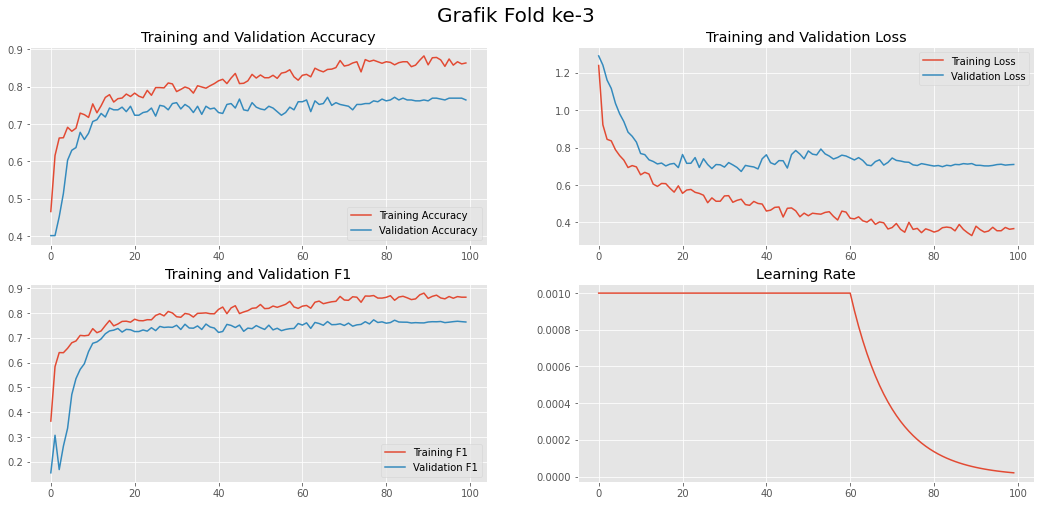


Fold 4/4

Found 1248 validated image filenames belonging to 4 classes.
Found 415 validated image filenames belonging to 4 classes.

Epoch 00001: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/100
38/38 [==============================] - 26s 661ms/step - loss: 1.1350 - accuracy: 0.5181 - f1: 0.4305 - val_loss: 1.2652 - val_accuracy: 0.3205 - val_f1: 0.1137 - lr: 0.0010

Epoch 00002: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/100
38/38 [==============================] - 20s 508ms/step - loss: 0.9379 - accuracy: 0.6168 - f1: 0.5708 - val_loss: 1.1988 - val_accuracy: 0.4265 - val_f1: 0.1154 - lr: 0.0010

Epoch 00003: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/100
38/38 [==============================] - 20s 512ms/step - loss: 0.8555 - accuracy: 0.6637 - f1: 0.6163 - val_loss: 1.1599 - val_accuracy: 0.4819 - val_f1: 0.2189 - lr: 0.0010

Epoch 00004: LearningRateScheduler setting learning ra

38/38 [==============================] - 20s 515ms/step - loss: 0.5232 - accuracy: 0.7952 - f1: 0.7864 - val_loss: 0.6464 - val_accuracy: 0.7711 - val_f1: 0.7626 - lr: 0.0010

Epoch 00031: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 31/100
38/38 [==============================] - 20s 521ms/step - loss: 0.5193 - accuracy: 0.7919 - f1: 0.7821 - val_loss: 0.6763 - val_accuracy: 0.7373 - val_f1: 0.7388 - lr: 0.0010

Epoch 00032: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 32/100
38/38 [==============================] - 20s 520ms/step - loss: 0.5269 - accuracy: 0.8010 - f1: 0.7950 - val_loss: 0.6598 - val_accuracy: 0.7590 - val_f1: 0.7538 - lr: 0.0010

Epoch 00033: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 33/100
38/38 [==============================] - 20s 518ms/step - loss: 0.4866 - accuracy: 0.8158 - f1: 0.8161 - val_loss: 0.6576 - val_accuracy: 0.7494 - val_f1: 0.7460 - lr: 0.0010

Epoch 00

38/38 [==============================] - 20s 515ms/step - loss: 0.4314 - accuracy: 0.8347 - f1: 0.8337 - val_loss: 0.6796 - val_accuracy: 0.7783 - val_f1: 0.7897 - lr: 0.0010

Epoch 00061: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 61/100
38/38 [==============================] - 19s 506ms/step - loss: 0.4571 - accuracy: 0.8273 - f1: 0.8168 - val_loss: 0.6787 - val_accuracy: 0.7735 - val_f1: 0.7791 - lr: 0.0010

Epoch 00062: LearningRateScheduler setting learning rate to tf.Tensor(0.0009048374, shape=(), dtype=float32).
Epoch 62/100
38/38 [==============================] - 20s 514ms/step - loss: 0.4203 - accuracy: 0.8372 - f1: 0.8327 - val_loss: 0.6616 - val_accuracy: 0.7590 - val_f1: 0.7730 - lr: 9.0484e-04

Epoch 00063: LearningRateScheduler setting learning rate to tf.Tensor(0.0008187307, shape=(), dtype=float32).
Epoch 63/100
38/38 [==============================] - 20s 514ms/step - loss: 0.3994 - accuracy: 0.8413 - f1: 0.8373 - val_loss: 0.6910 - va

38/38 [==============================] - 20s 509ms/step - loss: 0.3949 - accuracy: 0.8331 - f1: 0.8319 - val_loss: 0.6419 - val_accuracy: 0.7807 - val_f1: 0.7792 - lr: 7.4273e-05

Epoch 00088: LearningRateScheduler setting learning rate to tf.Tensor(6.720541e-05, shape=(), dtype=float32).
Epoch 88/100
38/38 [==============================] - 19s 505ms/step - loss: 0.3839 - accuracy: 0.8536 - f1: 0.8477 - val_loss: 0.6398 - val_accuracy: 0.7783 - val_f1: 0.7774 - lr: 6.7205e-05

Epoch 00089: LearningRateScheduler setting learning rate to tf.Tensor(6.0809965e-05, shape=(), dtype=float32).
Epoch 89/100
38/38 [==============================] - 19s 507ms/step - loss: 0.3824 - accuracy: 0.8388 - f1: 0.8423 - val_loss: 0.6383 - val_accuracy: 0.7831 - val_f1: 0.7751 - lr: 6.0810e-05

Epoch 00090: LearningRateScheduler setting learning rate to tf.Tensor(5.502313e-05, shape=(), dtype=float32).
Epoch 90/100
38/38 [==============================] - 20s 509ms/step - loss: 0.3793 - accuracy: 0.8520 

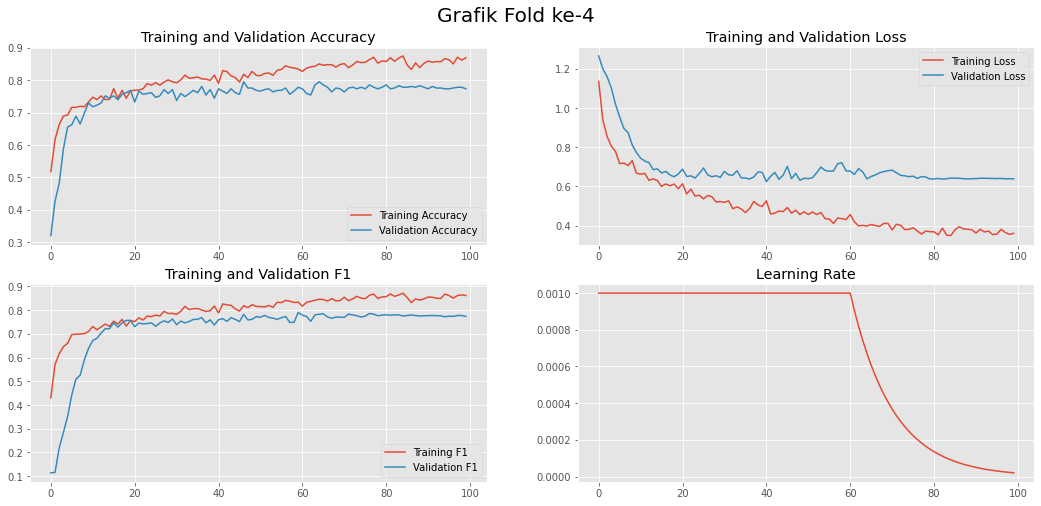

In [99]:
img_size = 180
fold_var = 0
epochs=100
for train_index, val_index in skf.split(X_train, y_train) :
    training_data = X_train.iloc[train_index]
    validation_data = X_train.iloc[val_index]
    
    fold_var += 1
    print("Fold ", fold_var, "/", num_fold, sep='')
    print()
    
    train_generator = train_datagen.flow_from_dataframe(dataframe=training_data,
                                                          x_col="Image path",  
                                                          y_col="Class",  
                                                          target_size=(img_size, img_size),
                                                          batch_size= 32,
                                                          seed = 2022)

    validation_generator = validation_datagen.flow_from_dataframe(dataframe=validation_data,
                                                                    x_col="Image path",
                                                                    y_col="Class",
                                                                    target_size=(img_size, img_size),
                                                                    batch_size=16,
                                                                    seed = 2022)
    
    tf.keras.backend.clear_session()
    model = getModel()
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', f1])
    
#    checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#                      filepath='weights-improvement-fold ke%d-{epoch:04d}-{val_f1:.5f}.hdf5'%fold_var,
#                      monitor='val_f1',
#                      mode='max',
#                      save_best_only=True,
#                      verbose=1)

    callbacks = [keras.callbacks.LearningRateScheduler(scheduler, verbose=1)]
    
    history = model.fit(train_generator,
                        epochs=epochs,
                        validation_data=validation_generator,
                        callbacks = callbacks,
                        steps_per_epoch = 1247 // 32,
                        validation_steps = 416 // 16)
    
    accuracy += [history.history['accuracy']]
    val_accuracy += [history.history['val_accuracy']]

    loss += [history.history['loss']]
    val_loss += [history.history['val_loss']]

    f_1 += [history.history['f1']]
    val_f1 += [history.history['val_f1']]
    
    plot_result(history, 
                epochs, 
                "Grafik Fold ke-{}".format(str(fold_var)))
    
#    tf.saved_model.save(model, 
#                        export_dir = 'D:/Latihan/Model save')
    print()

In [100]:
# Provide average scores
mean_loss = []
mean_accuracy = []
mean_val_loss = []
mean_val_accuracy = []
mean_f1 = []
mean_val_f1 = []
print('------------------------------------------------------------------------')
print('Score per Fold')
for i in range(0, fold_var):
    print('----------------------------------------------------------------------------')
    print('> Fold {} - Loss: {} - Accuracy: {}'.format(i+1,np.mean(loss[i]), np.mean(accuracy[i])))
    print('> Fold {} - Val Loss: {} - Val Accuracy: {}'.format(i+1, np.mean(val_loss[i]), np.mean(val_accuracy[i])))
    print('> Fold {} - F1: {} - Val F1: {}'.format(i+1, np.mean(f_1[i]), np.mean(val_f1[i])))
    
    mean_loss.append(np.mean(loss[i]))
    mean_accuracy.append(np.mean(accuracy[i]))
    mean_val_loss.append(np.mean(val_loss[i]))
    mean_val_accuracy.append(np.mean(val_accuracy[i]))
    mean_f1.append(np.mean(f_1[i]))
    mean_val_f1.append(np.mean(val_f1[i]))
    
print('------------------------------------------------------------------------------')
print('Average scores for all folds:')
print('> Loss: {} - Accuracy: {} (+- {})'.format(np.mean(mean_loss), np.mean(mean_accuracy), np.std(mean_accuracy)))
print('> Val Loss: {} - Val Accuracy: {} (+- {})'.format(np.mean(mean_val_loss), np.mean(mean_val_accuracy), np.std(mean_val_accuracy)))
print('> F1: {} - Val F1: {}'.format(np.mean(mean_f1), np.mean(mean_val_f1)))
print('------------------------------------------------------------------------------')

------------------------------------------------------------------------
Score per Fold
----------------------------------------------------------------------------
> Fold 1 - Loss: 0.4874551972746849 - Accuracy: 0.8099282664060593
> Fold 1 - Val Loss: 0.775895539522171 - Val Accuracy: 0.7263221147656441
> Fold 1 - F1: 0.8023144116997719 - Val F1: 0.6895866779051721
----------------------------------------------------------------------------
> Fold 2 - Loss: 0.4894716367125511 - Accuracy: 0.8082038789987565
> Fold 2 - Val Loss: 0.806707883477211 - Val Accuracy: 0.7304086518287659
> Fold 2 - F1: 0.8017437151074409 - Val F1: 0.6984200190007687
----------------------------------------------------------------------------
> Fold 3 - Loss: 0.4894557771086693 - Accuracy: 0.8100095504522323
> Fold 3 - Val Loss: 0.7539262217283249 - Val Accuracy: 0.7302644240856171
> Fold 3 - F1: 0.8040979841351509 - Val F1: 0.7121050927042961
--------------------------------------------------------------------

## Last part from SKFold

In [101]:
train_generator = train_datagen.flow_from_dataframe(dataframe=X_train,
                                                          x_col="Image path",  
                                                          y_col="Class",  
                                                          target_size=(img_size, img_size),
                                                          batch_size= 16,
                                                          seed = 2022)

last = getModel()
last.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

callbacks = [keras.callbacks.LearningRateScheduler(scheduler, verbose=1)]
    
history_last = last.fit(train_generator,
                         epochs=2,
                         shuffle = True,
                         callbacks = callbacks)

Found 1663 validated image filenames belonging to 4 classes.

Epoch 00001: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/2
104/104 [==============================] - 20s 185ms/step - loss: 1.1231 - accuracy: 0.5328 - lr: 0.0010

Epoch 00002: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/2
104/104 [==============================] - 19s 186ms/step - loss: 0.8956 - accuracy: 0.6410 - lr: 0.0010


In [102]:
test_generator = test_datagen.flow_from_dataframe(dataframe=X_test,
                                                  x_col="Image path",
                                                  y_col="Class",
                                                  target_size=(img_size, img_size),
                                                  batch_size=1,
                                                  seed = 2022)

predictions = last.predict(test_generator)
yPredictions = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
print()
print("==========")
k = PrettyTable(['Accuracy Predictions', 'Accuracy Precision', 'Accuracy f1'])
k.add_row([accuracy_score(true_classes, yPredictions), 
            precision_score(true_classes, yPredictions, average='weighted'), 
            f1_score(true_classes, yPredictions, average='weighted')])
print(k)
confusion_matrix = confusion_matrix(true_classes, yPredictions)
print("==========")

Found 185 validated image filenames belonging to 4 classes.

+----------------------+---------------------+---------------------+
| Accuracy Predictions |  Accuracy Precision |     Accuracy f1     |
+----------------------+---------------------+---------------------+
|  0.2594594594594595  | 0.25504543352644615 | 0.24736424638863663 |
+----------------------+---------------------+---------------------+


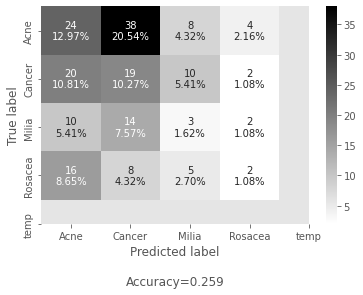

In [103]:
import cf_matrix

categories = ['Acne', 'Cancer', 'Milia', 'Rosacea', 'temp']
cf_matrix.make_confusion_matrix(confusion_matrix, 
                                categories=categories, 
                                cmap='binary')

<function matplotlib.pyplot.show(close=None, block=None)>

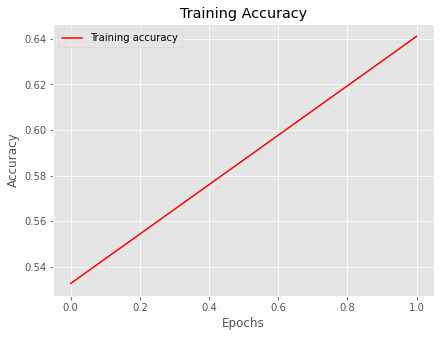

In [104]:
# Plot the results
acc = history_last.history['accuracy']

epochs = range(len(acc))

fig = plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend(loc=0)
plt.show